<a href="https://colab.research.google.com/github/Sunjung-Dev/AtoI-project/blob/main/window_size_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install finance-datareader

In [2]:
import FinanceDataReader as fdr
df = fdr.DataReader(symbol='005930',start='2020-02-19') #삼성전자, 2020년부터 현재
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-19,59800,60400,59400,60200,12951496,0.006689
2020-02-20,60700,61300,59600,60000,14591924,-0.003322
2020-02-21,58800,59800,58500,59200,13777393,-0.013333
2020-02-24,57400,58100,56800,56800,25627537,-0.040541
2020-02-25,56200,58000,56200,57900,23885408,0.019366
...,...,...,...,...,...,...
2021-02-15,83800,84500,83300,84200,23529706,0.031863
2021-02-16,84500,86000,84200,84900,20483100,0.008314
2021-02-17,83900,84200,83000,83200,18307735,-0.020024


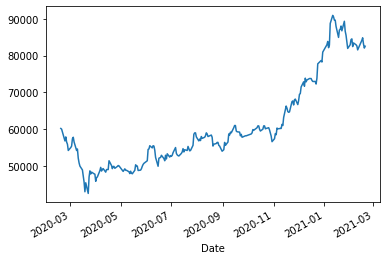

In [3]:
df['Close'].plot(); #주가이동표?

In [4]:
import numpy as np
import pandas as pd
import os
import json
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
base_dir = "/content/gdrive/MyDrive"
#file_name = "df.xlsx"
#xlxs_dir = os.path.join(base_dir,file_name)

In [7]:
df_price = pd.read_csv(os.path.join(base_dir,'005930.KS.csv'),encoding='utf8')
df_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,60600.401606,61402.811245,59898.594378,60616.064257,59066.623871,2.381717e+07
std,11848.228730,12174.702426,11759.358320,11935.824826,12484.814848,1.059794e+07
min,42600.000000,43550.000000,42300.000000,42500.000000,40629.570313,0.000000e+00
25%,52100.000000,52900.000000,51700.000000,52300.000000,50367.417969,1.690572e+07
50%,57500.000000,58100.000000,56800.000000,57800.000000,55745.511719,2.115717e+07
75%,64100.000000,66200.000000,63900.000000,64800.000000,63209.226563,2.804683e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,91000.000000,9.030618e+07


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
#scale_cols = ['시가', '고가', '저가', '종가', '거래량']
scale_cols = ['Open','High', 'Low', 'Close', 'Volume']  #왜 volume 인식 못하는지 모를 일
df_scaled = scaler.fit_transform(df[scale_cols])


In [10]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.colums = scale_cols

print(df_scaled)

            0         1         2         3         4
0    0.360587  0.316432  0.362288  0.364948  0.044815
1    0.379455  0.333333  0.366525  0.360825  0.065071
2    0.339623  0.305164  0.343220  0.344330  0.055013
3    0.310273  0.273239  0.307203  0.294845  0.201340
4    0.285115  0.271362  0.294492  0.317526  0.179828
..        ...       ...       ...       ...       ...
244  0.863732  0.769014  0.868644  0.859794  0.175436
245  0.878407  0.797183  0.887712  0.874227  0.137816
246  0.865828  0.763380  0.862288  0.839175  0.110954
247  0.851153  0.752113  0.843220  0.816495  0.148245
248  0.832285  0.737089  0.819915  0.826804  0.199386

[249 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [11]:
def make_dataset(data, label, window_size = 90):
  feature_list = []
  label_list = []
  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)

In [12]:
feature_cols = [0,1, 2,4] #시가, 고가, 저가, 거래량
label_cols = [3]  #종가

In [13]:
TEST_SIZE = 100
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [14]:
train_feature = train[feature_cols]
train_label = train[label_cols]

In [15]:
train_feature, train_label = make_dataset(train_feature,train_label,20)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature,train_label,test_size = 0.2)

In [17]:
x_train.shape, x_valid.shape

((103, 20, 4), (26, 20, 4))

In [18]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [19]:
test_feature.shape, test_label.shape

((100, 4), (100, 1))

In [20]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
#test_size를 36으로 설정하면 결과가 0으로만 나옴

((80, 20, 4), (80, 1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(90, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
        )
model.add(Dense(1))

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [24]:
model_path='model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

In [25]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid,y_valid),
                    callbacks=[early_stop,checkpoint])

Epoch 1/200
7/7 [==============================] - 2s 109ms/step - loss: 0.0450 - val_loss: 0.0103

Epoch 00001: val_loss improved from inf to 0.01027, saving model to model/tmp_checkpoint.h5
Epoch 2/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0089 - val_loss: 0.0045

Epoch 00002: val_loss improved from 0.01027 to 0.00449, saving model to model/tmp_checkpoint.h5
Epoch 3/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0076 - val_loss: 0.0020

Epoch 00003: val_loss improved from 0.00449 to 0.00198, saving model to model/tmp_checkpoint.h5
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 0.0023 - val_loss: 0.0019

Epoch 00004: val_loss improved from 0.00198 to 0.00190, saving model to model/tmp_checkpoint.h5
Epoch 5/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0026 - val_loss: 0.0013

Epoch 00005: val_loss improved from 0.00190 to 0.00130, saving model to model/tmp_checkpoint.h5
Epoch 6/200
7/7 [===========

In [26]:
model.load_weights(filename)
pred=model.predict(test_feature)

In [27]:
pred.shape

(80, 1)

In [28]:
import matplotlib.pyplot as plt

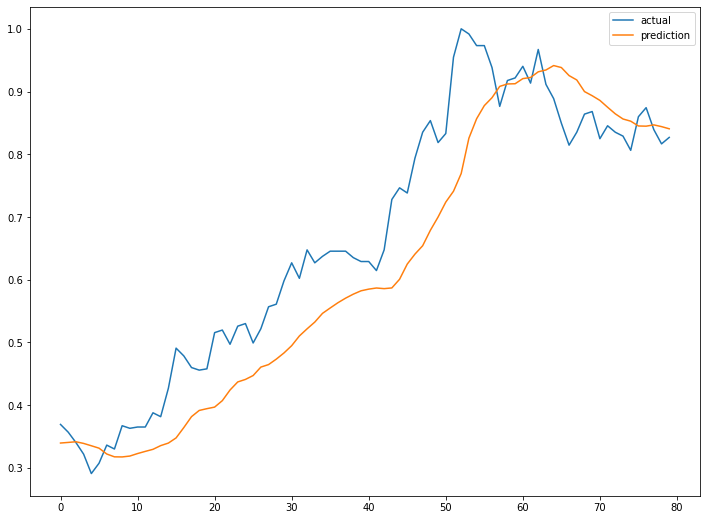

In [29]:
plt.figure(figsize=(12,9))
plt.plot(test_label,label='actual')
plt.plot(pred,label='prediction')
plt.legend()
plt.show()